<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [35]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

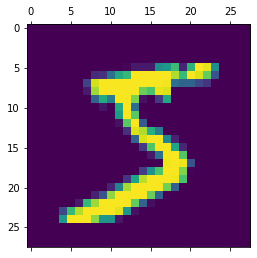

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4903 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3055 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2852 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2746 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.9260


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2682 - accuracy: 0.9266


[0.2681879699230194, 0.9265999794006348]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.3762337e-05, 8.2754623e-11, 9.3089686e-05, 6.5603554e-03,
       9.2636958e-07, 1.0039855e-04, 9.2179964e-10, 7.7465224e-01,
       8.6882152e-05, 7.2789192e-04], dtype=float32)

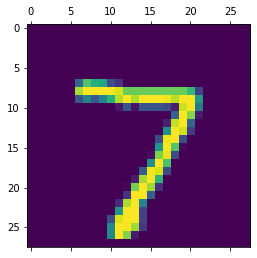

In [17]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    2,    1,    0,    8,    7,    4,    3,    0],
       [   0, 1109,    5,    1,    0,    1,    3,    2,   14,    0],
       [   3,    6,  941,    8,    7,    5,   12,    9,   38,    3],
       [   3,    0,   28,  895,    0,   35,    2,   14,   29,    4],
       [   1,    1,    7,    0,  913,    0,    9,    5,   10,   36],
       [   7,    2,    7,   17,    9,  800,    7,    6,   31,    6],
       [   7,    3,   10,    1,    8,   22,  901,    2,    4,    0],
       [   1,    5,   27,    2,    4,    0,    0,  963,    3,   23],
       [   4,    5,    7,   13,    9,   24,    8,   14,  885,    5],
       [   7,    5,    2,    8,   24,   10,    0,   37,   12,  904]])>

Text(69.0, 0.5, 'Truth')

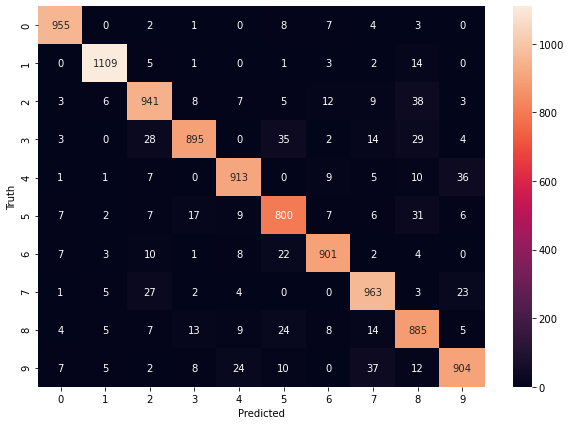

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - ETA: 0s - loss: 0.2940 - accuracy: 0.91 - 6s 3ms/step - loss: 0.2937 - accuracy: 0.9189
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1369 - accuracy: 0.9604
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0995 - accuracy: 0.9705
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0768 - accuracy: 0.9768
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0625 - accuracy: 0.9816


In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.9740


[0.08559034019708633, 0.9739999771118164]

Text(69.0, 0.5, 'Truth')

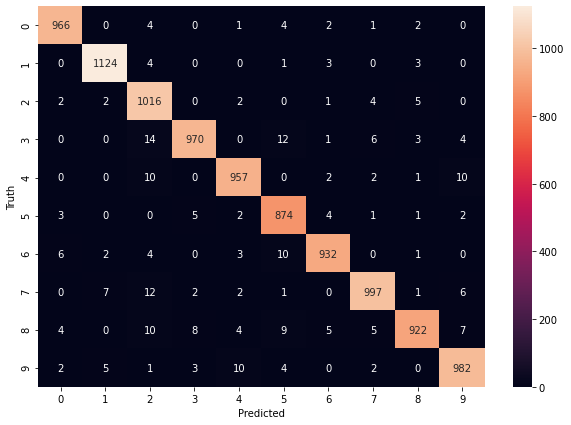

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2959 - accuracy: 0.9176
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1409 - accuracy: 0.9590
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0986 - accuracy: 0.9706
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0764 - accuracy: 0.9773
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0622 - accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9844
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0427 - accuracy: 0.9870
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0356 - accuracy: 0.9890
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0290 - accuracy: 0.9916
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.025

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9749


[0.08531247079372406, 0.9749000072479248]

In [28]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [29]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [33]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1898 - accuracy: 0.9444
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0640 - accuracy: 0.9804
Epoch 3/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0428 - accuracy: 0.9869
Epoch 4/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0301 - accuracy: 0.9906
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0218 - accuracy: 0.9934


In [ ]:
y_train[:5]

In [ ]:
model.evaluate(X_test,y_test)